In [2]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

chips_final = pd.read_csv('chips_final.csv')

In [3]:
chips_final

,Unnamed: 0,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,PROD_NAME,BRAND,WEIGHT,PROD_QTY,TOT_SALES,BAG_SIZE
0,0,2018-10-17,1.0,1000.0,1.0,YOUNG SINGLES/COUPLES,Premium,5.0,Natural Chip Compny SeaSalt175g,Natural,175g,2.0,6.0,Small
1,1,2019-05-14,1.0,1307.0,348.0,MIDAGE SINGLES/COUPLES,Budget,66.0,CCs Nacho Cheese 175g,CCs,175g,3.0,6.3,Small
2,2,2019-05-20,1.0,1343.0,383.0,MIDAGE SINGLES/COUPLES,Budget,61.0,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2.0,2.9,Small
3,3,2018-08-17,2.0,2373.0,974.0,MIDAGE SINGLES/COUPLES,Budget,69.0,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175g,5.0,15.0,Small
4,4,2018-08-18,2.0,2426.0,1038.0,MIDAGE SINGLES/COUPLES,Budget,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g,3.0,13.8,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,264830,2018-08-13,272.0,272358.0,270154.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos Splash Of Lime 175g,Tostitos,175g,1.0,4.4,Small
264831,264831,2018-11-06,272.0,272379.0,270187.0,YOUNG SINGLES/COUPLES,Premium,51.0,Doritos Mexicana 170g,Doritos,170g,2.0,8.8,Small
264832,264832,2018-12-27,272.0,272379.0,270188.0,YOUNG SINGLES/COUPLES,Premium,42.0,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150g,2.0,7.8,Small
264833,264833,2018-09-22,272.0,272380.0,270189.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos Splash Of Lime 175g,Tostitos,175g,2.0,8.8,Small


In [5]:
# remove old index
chips_final = chips_final.drop('Unnamed: 0', axis=1)

In [6]:
chips_final.to_csv('chips_final.csv')

In [7]:
chips_final['SHORT_DATE'].dtype

dtype('O')

In [8]:
# lets create a month and year column
chips_final['SHORT_DATE'] = pd.to_datetime(chips_final['SHORT_DATE'])

chips_final['MONTH_YEAR'] = chips_final['SHORT_DATE'].dt.strftime('%m/%Y')

In [9]:
chips_final['MONTH_YEAR']

0         10/2018
1         05/2019
2         05/2019
3         08/2018
4         08/2018
           ...   
264830    08/2018
264831    11/2018
264832    12/2018
264833    09/2018
264834    12/2018
Name: MONTH_YEAR, Length: 264835, dtype: object

In [10]:
# to find comparable stores, we will isolate the timframe from July 2018 to January 31st 2019

chips_final['MONTH_YEAR'] = pd.to_datetime(chips_final['MONTH_YEAR'])
chips_before = chips_final[(chips_final['MONTH_YEAR'] >= '07/2018') & (chips_final['MONTH_YEAR'] <= '01/2019')]

chips_before['MONTH_YEAR'].value_counts()

2018-12-01    22836
2018-07-01    22562
2018-08-01    22410
2018-10-01    22288
2019-01-01    22161
2018-11-01    21852
2018-09-01    21743
Name: MONTH_YEAR, dtype: int64

In [16]:
# grouping by store number and month year
chips_grp_before = chips_before.groupby(['STORE_NBR', 'MONTH_YEAR'])

total_grp = chips_grp_before['TOT_SALES'].sum()

total_grp

STORE_NBR  MONTH_YEAR
1.0        2018-07-01    206.9
           2018-08-01    176.1
           2018-09-01    278.8
           2018-10-01    188.1
           2018-11-01    192.6
                         ...  
272.0      2018-09-01    304.7
           2018-10-01    430.6
           2018-11-01    376.2
           2018-12-01    403.9
           2019-01-01    423.0
Name: TOT_SALES, Length: 1848, dtype: float64

In [18]:
# looking at total sales by store number
chips_grp_sales = chips_before.groupby('STORE_NBR')
total_sales = chips_grp_sales['TOT_SALES'].sum()
total_sales

STORE_NBR
1.0      1386.90
2.0      1128.50
3.0      7526.15
4.0      9127.00
5.0      5739.70
          ...   
268.0    1549.05
269.0    6664.50
270.0    6697.95
271.0    5765.10
272.0    2744.35
Name: TOT_SALES, Length: 271, dtype: float64

In [19]:
# looking for trail store
trial_store = total_sales[77:88]
trial_store

STORE_NBR
77.0    1699.00
78.0    5466.40
79.0    7143.15
80.0    6953.40
81.0    8260.30
82.0    2289.90
83.0    5739.80
84.0    3238.50
85.0      13.90
86.0    6119.85
87.0    2385.50
88.0    9383.60
Name: TOT_SALES, dtype: float64

#### Total sales for trial stores between July 2018 and January 2019
- Store 77: 1699.00
- Store 86: 6119.85
- Store 88: 9383.60

Now since we have the total sales for the trial stores, lets look for matching control stores for each.

In [20]:
# sorting stores by total sales looking for a match for store 77
total_sorted = total_sales.sort_values(ascending=True)
total_sorted.iloc[63:73]

STORE_NBR
53.0     1611.1
6.0      1618.8
255.0    1636.6
233.0    1659.8
188.0    1683.5
77.0     1699.0
187.0    1702.2
90.0     1736.4
46.0     1758.0
220.0    1788.6
Name: TOT_SALES, dtype: float64

In [21]:
# isolating the 10 stores
stores_control_1 = [6,46,53,77,90,187,188,220,233,255]
control_1 = pd.DataFrame({'Value': total_grp[stores_control_1]})
print(control_1)

                      Value
STORE_NBR MONTH_YEAR       
6.0       2018-07-01  260.0
          2018-08-01  203.2
          2018-09-01  207.7
          2018-10-01  292.4
          2018-11-01  255.3
...                     ...
255.0     2018-09-01  227.7
          2018-10-01  235.6
          2018-11-01  253.2
          2018-12-01  262.4
          2019-01-01  231.7

[70 rows x 1 columns]


In [22]:
# putting the 10 stores in a pivot chart format
pivot_chips_1 = control_1.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='Value')
pivot_chips_1

STORE_NBR,6.0,46.0,53.0,77.0,90.0,187.0,188.0,220.0,233.0,255.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,260.0,253.0,229.8,296.8,235.4,253.9,234.4,244.1,290.7,254.1
2018-08-01,203.2,240.7,255.1,255.5,224.5,214.3,210.3,275.0,285.9,171.9
2018-09-01,207.7,233.0,188.0,225.2,162.4,276.1,280.8,219.3,228.6,227.7
2018-10-01,292.4,275.1,238.9,204.5,319.4,181.4,246.3,293.4,185.7,235.6
2018-11-01,255.3,273.1,223.8,245.3,226.2,327.9,236.8,290.7,211.6,253.2
2018-12-01,209.1,306.9,302.6,267.3,262.7,264.4,266.8,227.4,279.8,262.4
2019-01-01,191.1,176.2,172.9,204.4,305.8,184.2,208.1,238.7,177.5,231.7


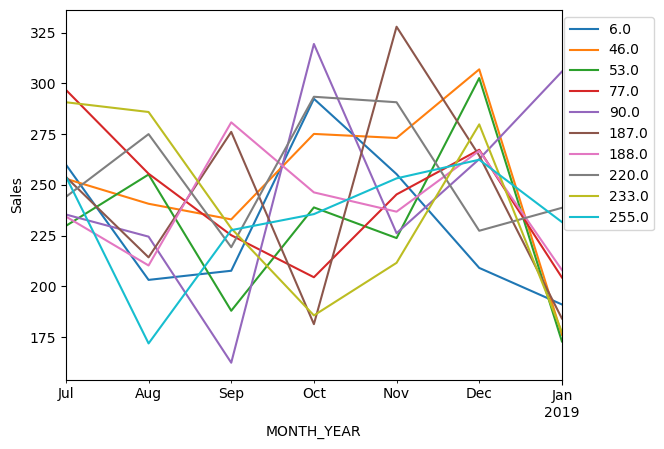

In [24]:
pivot_chips_1.plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.ylabel('Sales')
plt.show()

In [25]:
# looking at correlation
pivot_chips_1.corr(method='pearson')

STORE_NBR,6.0,46.0,53.0,77.0,90.0,187.0,188.0,220.0,233.0,255.0
STORE_NBR,,,,,,,,,,
6.0,1.000000,0.484580,0.139538,0.042490,0.288923,0.041493,0.115455,0.641903,-0.176677,0.363013
46.0,0.484580,1.000000,0.838008,0.435650,-0.038130,0.433520,0.527886,0.239256,0.401329,0.402832
53.0,0.139538,0.838008,1.000000,0.532764,0.112228,0.125959,0.199495,0.133959,0.625439,0.101587
77.0,0.042490,0.435650,0.532764,1.000000,-0.377649,0.460669,0.042708,-0.183091,0.903774,0.191091
90.0,0.288923,-0.038130,0.112228,-0.377649,1.000000,-0.681605,-0.422287,0.341478,-0.453268,0.177864
187.0,0.041493,0.433520,0.125959,0.460669,-0.681605,1.000000,0.457048,-0.086637,0.280566,0.421864
188.0,0.115455,0.527886,0.199495,0.042708,-0.422287,0.457048,1.000000,-0.422733,0.090490,0.461834
220.0,0.641903,0.239256,0.133959,-0.183091,0.341478,-0.086637,-0.422733,1.000000,-0.271433,-0.223507
233.0,-0.176677,0.401329,0.625439,0.903774,-0.453268,0.280566,0.090490,-0.271433,1.000000,-0.128047


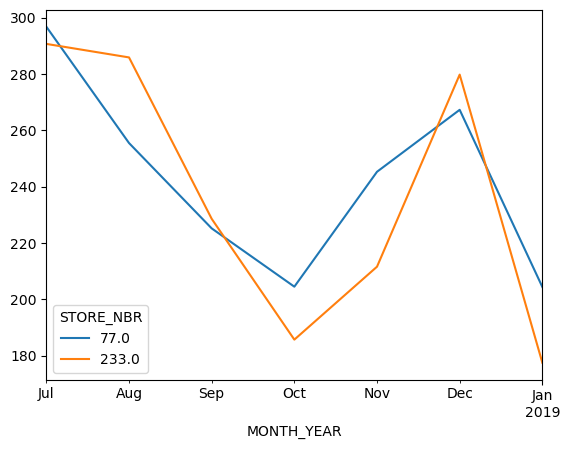

In [27]:
# store 233 is the strongest correlation at 0.90

chips_1_graph = pivot_chips_1[[77,233]]
chips_1_graph.plot()
plt.show()

#### For trial store number 77, we will use store number 233 for a control store. It's a 0.90 correlation and only 40 dollar difference between the stores

In [28]:
# looking for control store to match with store 86
total_sorted.iloc[176:186]

STORE_NBR
23.0     6098.90
48.0     6112.30
172.0    6113.40
13.0     6114.70
86.0     6119.85
196.0    6126.30
57.0     6147.40
30.0     6194.60
236.0    6197.40
105.0    6206.20
Name: TOT_SALES, dtype: float64

In [29]:
# isolating the 10 stores
stores_control_2 = [13,23,30,48,57,86,105,172,196,236]
control_2 = pd.DataFrame({'Value': total_grp[stores_control_2]})
print(control_2)

                       Value
STORE_NBR MONTH_YEAR        
13.0      2018-07-01   811.8
          2018-08-01   756.9
          2018-09-01   840.0
          2018-10-01   851.0
          2018-11-01  1049.4
...                      ...
236.0     2018-09-01   864.6
          2018-10-01   879.6
          2018-11-01   705.2
          2018-12-01   987.0
          2019-01-01   838.2

[70 rows x 1 columns]


In [30]:
# putting the 10 stores in a pivot chart format
pivot_chips_2 = control_2.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='Value')
pivot_chips_2

STORE_NBR,13.0,23.0,30.0,48.0,57.0,86.0,105.0,172.0,196.0,236.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,811.8,890.8,879.8,929.4,839.6,892.20,928.9,820.8,876.2,952.0
2018-08-01,756.9,952.1,935.8,851.1,915.4,764.05,923.7,758.0,848.7,970.8
2018-09-01,840.0,720.8,860.6,809.8,792.8,914.60,846.6,816.4,858.4,864.6
2018-10-01,851.0,793.4,862.6,879.2,965.8,948.40,880.0,1040.8,846.0,879.6
2018-11-01,1049.4,826.0,819.0,785.4,830.0,918.00,771.4,851.4,770.2,705.2
2018-12-01,878.6,985.0,1014.0,917.2,951.0,841.20,1048.6,928.8,1007.4,987.0
2019-01-01,927.0,930.8,822.8,940.2,852.8,841.40,807.0,897.2,919.4,838.2


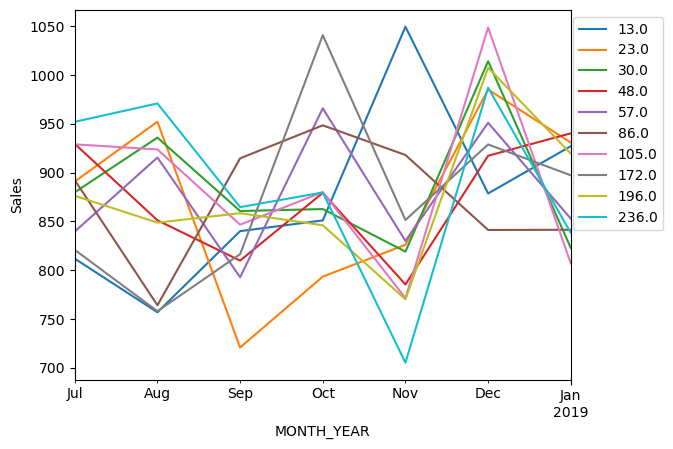

In [31]:
pivot_chips_2.plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.ylabel('Sales')
plt.show()

In [32]:
# looking at correlation
pivot_chips_2.corr(method='pearson')

STORE_NBR,13.0,23.0,30.0,48.0,57.0,86.0,105.0,172.0,196.0,236.0
STORE_NBR,,,,,,,,,,
13.0,1.000000,-0.150189,-0.477595,-0.310142,-0.283500,0.409610,-0.563172,0.240211,-0.270657,-0.853592
23.0,-0.150189,1.000000,0.594336,0.620930,0.458281,-0.784698,0.558633,-0.115548,0.600215,0.515399
30.0,-0.477595,0.594336,1.000000,0.292305,0.599159,-0.516913,0.952586,-0.021631,0.689615,0.805425
48.0,-0.310142,0.620930,0.292305,1.000000,0.363605,-0.271147,0.479948,0.303527,0.735414,0.573430
57.0,-0.283500,0.458281,0.599159,0.363605,1.000000,-0.218110,0.603628,0.593520,0.393114,0.495600
86.0,0.409610,-0.784698,-0.516913,-0.271147,-0.218110,1.000000,-0.381464,0.524475,-0.373196,-0.520981
105.0,-0.563172,0.558633,0.952586,0.479948,0.603628,-0.381464,1.000000,0.083882,0.739672,0.888408
172.0,0.240211,-0.115548,-0.021631,0.303527,0.593520,0.524475,0.083882,1.000000,0.239403,-0.086124
196.0,-0.270657,0.600215,0.689615,0.735414,0.393114,-0.373196,0.739672,0.239403,1.000000,0.665074


#### Running a correlation test shows the strongest store is 172 with 0.52
#### Even though these 9 are the the best fit with total sales its not the best fit when it comes to sales pattern over the month. I will further explore for better option.
#### I want to keep it as close as possible to the total sales of 6119.85. I'll grab the next by 10 above by total sales

In [33]:
total_sorted.iloc[180:195]

STORE_NBR
86.0     6119.85
196.0    6126.30
57.0     6147.40
30.0     6194.60
236.0    6197.40
105.0    6206.20
91.0     6230.00
109.0    6238.30
97.0     6264.95
180.0    6265.70
102.0    6286.00
164.0    6289.40
155.0    6308.70
184.0    6309.00
160.0    6311.60
Name: TOT_SALES, dtype: float64

In [34]:
# isolating the 10 stores
stores_control_3 = [86,91,97,102,109,155,160,164,180,184]
control_3 = pd.DataFrame({'Value': total_grp[stores_control_3]})
print(control_3)

                       Value
STORE_NBR MONTH_YEAR        
86.0      2018-07-01  892.20
          2018-08-01  764.05
          2018-09-01  914.60
          2018-10-01  948.40
          2018-11-01  918.00
...                      ...
184.0     2018-09-01  873.00
          2018-10-01  895.20
          2018-11-01  869.20
          2018-12-01  900.00
          2019-01-01  913.40

[70 rows x 1 columns]


In [35]:
# putting the 10 stores in a pivot chart format
pivot_chips_3 = control_3.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='Value')
pivot_chips_3

STORE_NBR,86.0,91.0,97.0,102.0,109.0,155.0,160.0,164.0,180.0,184.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,892.20,827.7,848.20,782.4,884.0,924.6,894.8,853.2,816.6,983.8
2018-08-01,764.05,916.1,917.35,986.4,828.3,782.7,756.2,920.2,788.5,874.4
2018-09-01,914.60,1000.1,908.80,970.4,871.4,1014.4,915.2,841.4,911.4,873.0
2018-10-01,948.40,851.8,993.20,902.2,957.6,963.8,887.4,863.2,871.4,895.2
2018-11-01,918.00,911.2,853.40,930.0,929.6,898.8,936.0,829.6,793.4,869.2
2018-12-01,841.20,866.8,899.40,816.6,908.8,849.8,1018.4,1031.6,995.0,900.0
2019-01-01,841.40,856.3,844.60,898.0,858.6,874.6,903.6,950.2,1089.4,913.4


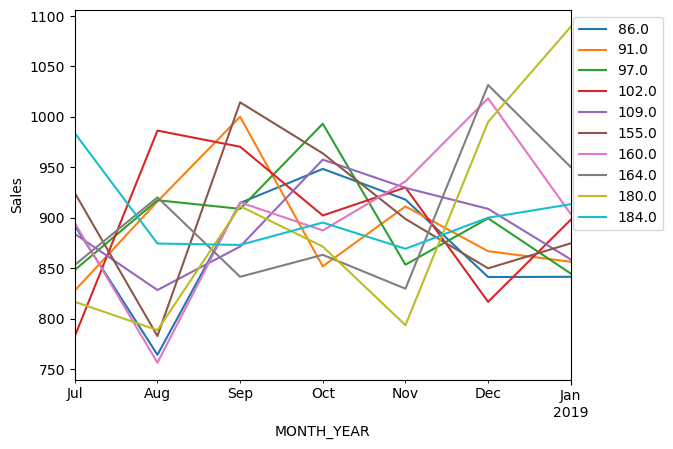

In [36]:
pivot_chips_3.plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.ylabel('Sales')
plt.show()

In [37]:
# looking at correlation
pivot_chips_3.corr(method='pearson')

STORE_NBR,86.0,91.0,97.0,102.0,109.0,155.0,160.0,164.0,180.0,184.0
STORE_NBR,,,,,,,,,,
86.0,1.000000,0.019027,0.211778,-0.158172,0.788300,0.877882,0.441970,-0.624613,-0.115073,0.072641
91.0,0.019027,1.000000,0.107347,0.756611,-0.286609,0.285142,-0.124414,-0.307085,-0.157871,-0.703307
97.0,0.211778,0.107347,1.000000,0.296909,0.378689,0.214531,-0.208412,-0.034539,-0.165523,-0.373501
102.0,-0.158172,0.756611,0.296909,1.000000,-0.305346,-0.017878,-0.554953,-0.307030,-0.208742,-0.826582
109.0,0.788300,-0.286609,0.378689,-0.305346,1.000000,0.451168,0.548266,-0.219011,-0.104106,-0.037604
155.0,0.877882,0.285142,0.214531,-0.017878,0.451168,1.000000,0.325977,-0.609502,0.021320,0.074457
160.0,0.441970,-0.124414,-0.208412,-0.554953,0.548266,0.325977,1.000000,0.296822,0.476804,0.097636
164.0,-0.624613,-0.307085,-0.034539,-0.307030,-0.219011,-0.609502,0.296822,1.000000,0.635272,0.009959
180.0,-0.115073,-0.157871,-0.165523,-0.208742,-0.104106,0.021320,0.476804,0.635272,1.000000,0.057764


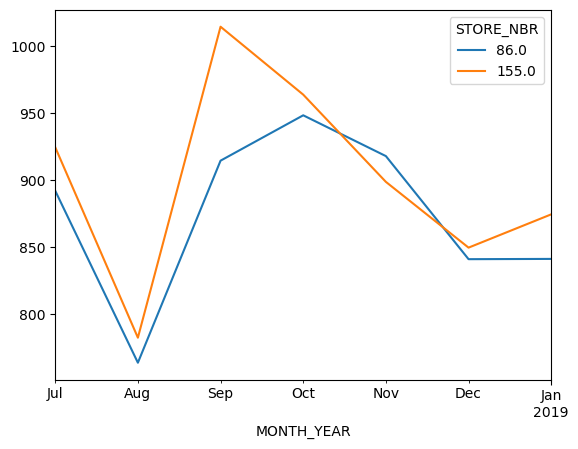

In [38]:
# store 155 is very close at 0.87 correlation
store_86_155 = pivot_chips_3[[86,155]]
store_86_155.plot()
plt.show()

In [39]:
# checking correlations on entire table
total_grp_df = pd.DataFrame(total_grp)

total_grp_pivot = total_grp_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')

total_grp_pivot_table = total_grp_pivot.corr(method='pearson')

total_grp_pivot_table[86].sort_values(ascending=False).head(10)

STORE_NBR
31.0     1.000000
86.0     1.000000
155.0    0.877882
132.0    0.846517
240.0    0.825066
222.0    0.795075
109.0    0.788300
138.0    0.759864
198.0    0.748794
114.0    0.734415
Name: 86.0, dtype: float64

#### Lets look at the other stores by total sales before we made decision.

In [41]:
# grabbing the total sales sorted series to see how the sales stock up for the top 4 above by strongest correlation
total_sorted.loc[[31,240,132,155]]

STORE_NBR
31.0       14.8
240.0    2790.1
132.0     271.8
155.0    6308.7
Name: TOT_SALES, dtype: float64

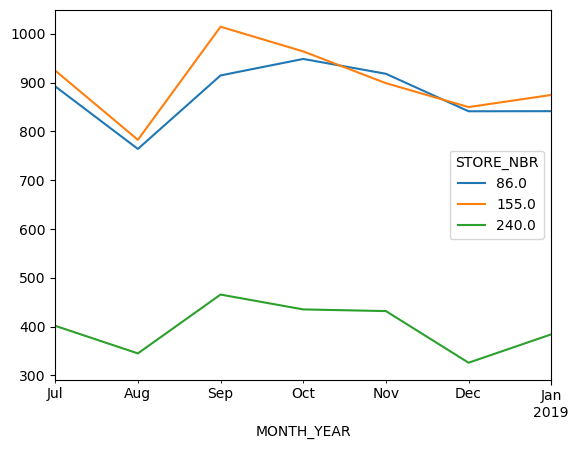

In [43]:
# stores 31 and 132 are way too low to use.
# grabbing stores 240,155,86 from total groub dataframe

three_stores = total_grp[[86,155,240]]

# create dataframe
three_stores_df = pd.DataFrame(three_stores)

#pivoting the dataframe
three_stores_pivot = three_stores_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')
three_stores_pivot.plot()
plt.show()

In [44]:
# looking for control store to match with store 88
total_grp_pivot_table[88].sort_values(ascending=False).head(10)

STORE_NBR
88.0     1.000000
159.0    0.903186
204.0    0.885774
134.0    0.864293
1.0      0.813636
253.0    0.811838
91.0     0.776688
61.0     0.748929
178.0    0.731857
188.0    0.716752
Name: 88.0, dtype: float64

In [45]:
# looking at total sales
total_sorted.iloc[260:]

STORE_NBR
26.0      8463.40
72.0      8518.50
199.0     8654.40
40.0      8866.80
203.0     8943.70
4.0       9127.00
58.0      9178.75
165.0     9237.80
237.0     9369.00
88.0      9383.60
226.0    10239.15
Name: TOT_SALES, dtype: float64

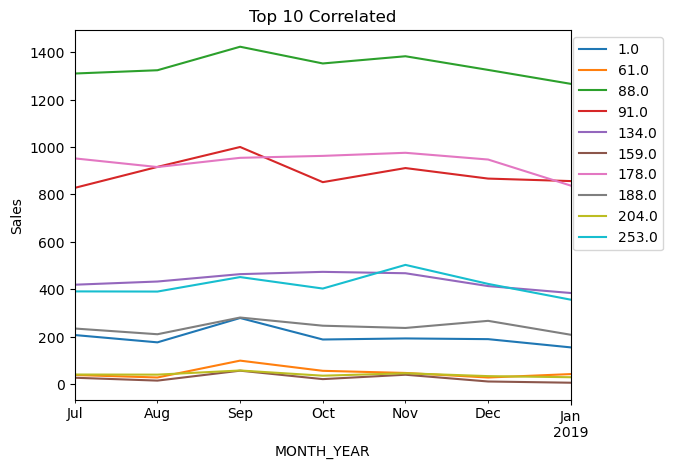

In [48]:
# none of them come close to sales amount but do match the pattern
chips_4 = total_grp[[1,61,88,91,134,159,178,188,204,253]]

#create a dataframe
chips_4_df = pd.DataFrame(chips_4)

# pivoting the df
chips_4_pivot = chips_4_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')

chips_4_pivot.plot()
plt.title('Top 10 Correlated')
plt.ylabel('Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.show()

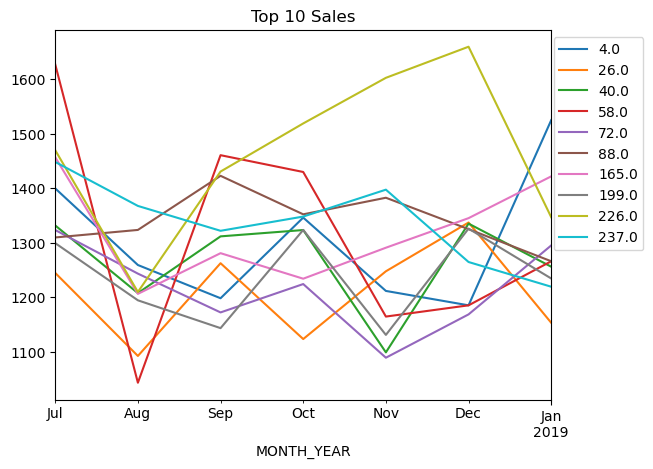

In [53]:
# Look at the total sales top 10
chips_5 = total_grp[[4,26,40,58,72,88,165,199,226,237]]

#create a dataframe
chips_5_df = pd.DataFrame(chips_5)

# pivoting the df
chips_5_pivot = chips_5_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')

chips_5_pivot.plot()
plt.title('Top 10 Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.show()

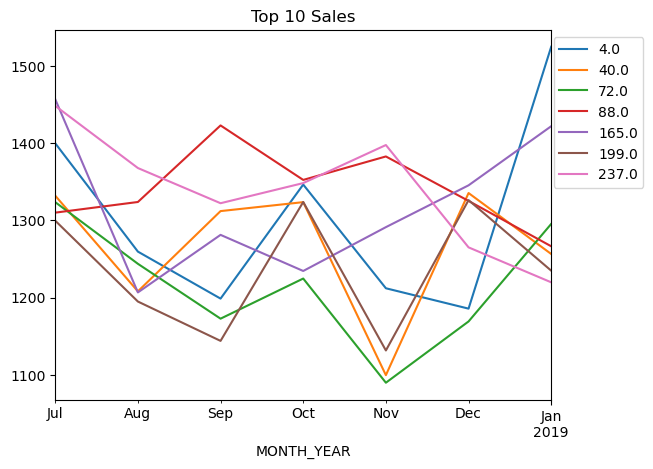

In [50]:
# removing 3 stores to better visualize
chips_5 = total_grp[[4,40,58,72,88,165,199,237]]

#create a dataframe
chips_5_df = pd.DataFrame(chips_5)

# pivoting the df
chips_5_pivot = chips_5_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')

chips_5_pivot.plot()
plt.title('Top 10 Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.show()

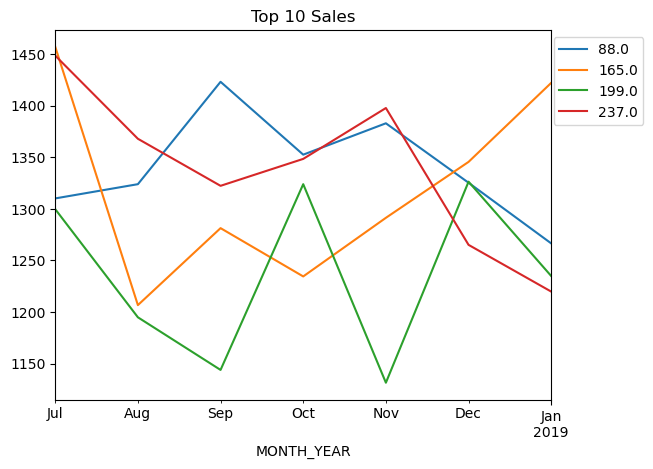

In [54]:
# removing 4 more  stores to better visualize
chips_5 = total_grp[[88,165,199,237]]

#create a dataframe
chips_5_df = pd.DataFrame(chips_5)

# pivoting the df
chips_5_pivot = chips_5_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')

chips_5_pivot.plot()
plt.title('Top 10 Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.show()

In [56]:
# store 237 come close to the pattren of store 88
sorted_88 = total_grp_pivot_table[88].sort_values(ascending=False)
sorted_88[237]

0.3084792217319044

#### Even though the correlation is very low at 0.30 this store makes the most sense by total sales
#### In top 10 sales store 237 which is the closest sales wise actually fits closest when graphed. I will procced with this store as the last control store

In [58]:
# isolating trial time period
chips_trial = chips_final[(chips_final['MONTH_YEAR'] >= '02/2019') & (chips_final['MONTH_YEAR'] <= '04/2019')]
chips_trial['MONTH_YEAR'].value_counts()

2019-03-01    22592
2019-04-01    21766
2019-02-01    20405
Name: MONTH_YEAR, dtype: int64

In [59]:
# creating new df for trial and control stores
tstore_77 = chips_trial[chips_trial['STORE_NBR'] == 77]
cstore_233 = chips_trial[chips_trial['STORE_NBR'] == 233]

tstore_86 = chips_trial[chips_trial['STORE_NBR'] == 86]
cstore_155 = chips_trial[chips_trial['STORE_NBR'] == 155]

tstore_88 = chips_trial[chips_trial['STORE_NBR'] == 88]
cstore_237 = chips_trial[chips_trial['STORE_NBR'] == 237]

tstore_77

,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,PROD_NAME,BRAND,WEIGHT,PROD_QTY,TOT_SALES,BAG_SIZE,MONTH_YEAR
1438,2019-03-28,77.0,77000.0,74911.0,MIDAGE SINGLES/COUPLES,Budget,18.0,Cheetos Chs & Bacon Balls 190g,Cheetos,190g,1.0,3.3,Small,2019-03-01
1439,2019-04-13,77.0,77000.0,74912.0,MIDAGE SINGLES/COUPLES,Budget,69.0,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175g,1.0,3.0,Small,2019-04-01
1441,2019-03-03,77.0,77063.0,74977.0,MIDAGE SINGLES/COUPLES,Budget,112.0,Tyrrells Crisps Ched & Chives 165g,Tyrrells,165g,2.0,8.4,Small,2019-03-01
1442,2019-02-20,77.0,77069.0,74985.0,MIDAGE SINGLES/COUPLES,Budget,98.0,NCC Sour Cream & Garden Chives 175g,Natural,175g,2.0,6.0,Small,2019-02-01
1443,2019-03-08,77.0,77069.0,74986.0,MIDAGE SINGLES/COUPLES,Budget,8.0,Smiths Crinkle Cut Chips Original 170g,Smiths,170g,2.0,5.8,Small,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260449,2019-03-14,77.0,77068.0,74984.0,YOUNG SINGLES/COUPLES,Premium,79.0,Smiths Chip Thinly CutSalt/Vinegr175g,Smiths,175g,1.0,3.0,Small,2019-03-01
260452,2019-02-03,77.0,77120.0,75047.0,YOUNG SINGLES/COUPLES,Premium,28.0,Thins Potato Chips Hot & Spicy 175g,Thins,175g,2.0,6.6,Small,2019-02-01
260454,2019-03-27,77.0,77141.0,75069.0,YOUNG SINGLES/COUPLES,Premium,82.0,Smith Crinkle Cut Mac N Cheese 150g,Smiths,150g,2.0,5.2,Small,2019-03-01
260459,2019-04-20,77.0,77371.0,75308.0,YOUNG SINGLES/COUPLES,Premium,54.0,CCs Original 175g,CCs,175g,2.0,4.2,Small,2019-04-01


In [60]:
# lets start with store 77 and 233 looking at total sales and product sold
tstore_77[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    777.0
PROD_QTY     234.0
dtype: float64

In [61]:
cstore_233[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    601.7
PROD_QTY     175.0
dtype: float64

In [62]:
#looking at repeat customers for trial store
tstore_77['LYLTY_CARD_NBR'].value_counts()

77000.0    2
77007.0    2
77454.0    2
77009.0    2
77115.0    2
          ..
77480.0    1
77478.0    1
77344.0    1
77105.0    1
77429.0    1
Name: LYLTY_CARD_NBR, Length: 124, dtype: int64

In [65]:
# total customer transactions
tstore_77[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    148
dtype: int64

In [66]:
cstore_233[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    121
dtype: int64

In [67]:
#looking at repeat customers for control store
cstore_233['LYLTY_CARD_NBR'].value_counts()

233398.0    2
233227.0    2
233449.0    2
233111.0    2
233071.0    2
           ..
233139.0    1
233451.0    1
233290.0    1
233221.0    1
233038.0    1
Name: LYLTY_CARD_NBR, Length: 112, dtype: int64

In [68]:
# counting repeat customer that purchased more than once
repeat_customers = tstore_77['LYLTY_CARD_NBR'].value_counts()

print(repeat_customers.head(24))

repeat_customers = 24

77000.0    2
77007.0    2
77454.0    2
77009.0    2
77115.0    2
77139.0    2
77450.0    2
77466.0    2
77206.0    2
77207.0    2
77389.0    2
77482.0    2
77338.0    2
77359.0    2
77424.0    2
77077.0    2
77341.0    2
77462.0    2
77420.0    2
77402.0    2
77069.0    2
77350.0    2
77123.0    2
77045.0    2
Name: LYLTY_CARD_NBR, dtype: int64


In [69]:
# grouping stores by month year
grouped_77 = tstore_77.groupby('MONTH_YEAR')
grouped_233 = cstore_233.groupby('MONTH_YEAR')

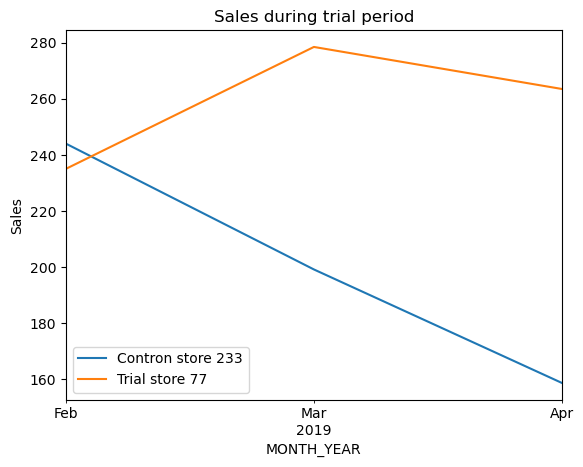

In [71]:
grouped_233['TOT_SALES'].sum().plot(label= 'Contron store 233')
grouped_77['TOT_SALES'].sum().plot(label= 'Trial store 77')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales during trial period')
plt.show()

In [72]:
# lets start with store 86 and 155 looking at total sales and product sold
tstore_86[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    2788.2
PROD_QTY      815.0
dtype: float64

In [73]:
cstore_155[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    2540.2
PROD_QTY      736.0
dtype: float64

In [74]:
#looking at repeat customers for trial store
tstore_86['LYLTY_CARD_NBR'].value_counts()

86112.0    6
86075.0    5
86116.0    5
86230.0    5
86172.0    5
          ..
86010.0    1
86205.0    1
86203.0    1
86013.0    1
86237.0    1
Name: LYLTY_CARD_NBR, Length: 215, dtype: int64

In [75]:
# total customer transactions
tstore_86[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    408
dtype: int64

In [76]:
cstore_155[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    368
dtype: int64

In [77]:
#looking at repeat customers for control store
cstore_155['LYLTY_CARD_NBR'].value_counts()

155082.0    5
155010.0    5
155153.0    5
155048.0    5
155014.0    4
           ..
155174.0    1
155171.0    1
155157.0    1
155160.0    1
155152.0    1
Name: LYLTY_CARD_NBR, Length: 190, dtype: int64

In [78]:
# grouping stores by month year
grouped_86 = tstore_86.groupby('MONTH_YEAR')
grouped_155 = cstore_155.groupby('MONTH_YEAR')

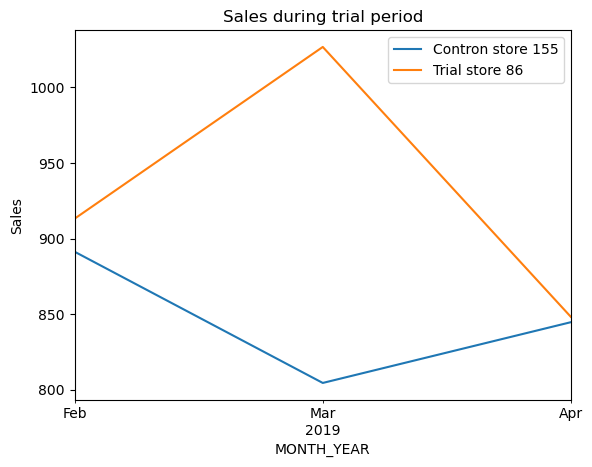

In [79]:
grouped_155['TOT_SALES'].sum().plot(label= 'Contron store 155')
grouped_86['TOT_SALES'].sum().plot(label= 'Trial store 86')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales during trial period')
plt.show()

In [80]:
# lets start with store 88 and 237 looking at total sales and product sold
tstore_88[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    4286.8
PROD_QTY      972.0
dtype: float64

In [81]:
cstore_237[['TOT_SALES', 'PROD_QTY']].sum()

TOT_SALES    3817.6
PROD_QTY      860.0
dtype: float64

In [82]:
#looking at repeat customers for trial store
tstore_88['LYLTY_CARD_NBR'].value_counts()

88313.0    6
88231.0    5
88259.0    4
88114.0    4
88105.0    4
          ..
88236.0    1
88256.0    1
88258.0    1
88315.0    1
88127.0    1
Name: LYLTY_CARD_NBR, Length: 261, dtype: int64

In [83]:
# total customer transactions
tstore_88[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    486
dtype: int64

In [84]:
cstore_237[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    430
dtype: int64

In [85]:
#looking at repeat customers for control store
cstore_237['LYLTY_CARD_NBR'].value_counts()

237366.0    6
237182.0    5
237325.0    5
237038.0    5
237234.0    4
           ..
237357.0    1
237358.0    1
237382.0    1
237054.0    1
237345.0    1
Name: LYLTY_CARD_NBR, Length: 262, dtype: int64

In [89]:
# grouping stores by month year
grouped_88 = tstore_88.groupby('MONTH_YEAR')
grouped_237 = cstore_237.groupby('MONTH_YEAR')

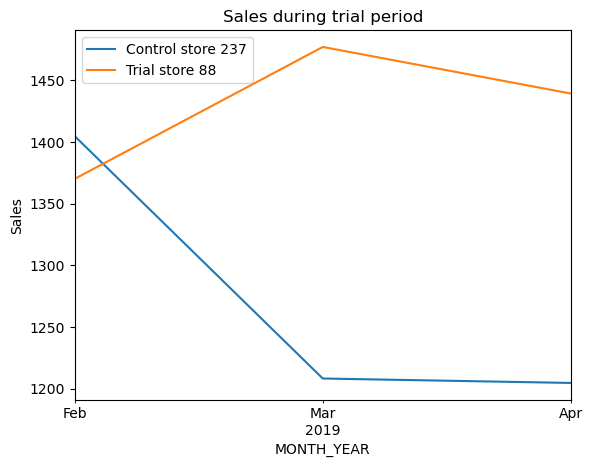

In [90]:
grouped_237['TOT_SALES'].sum().plot(label= 'Control store 237')
grouped_88['TOT_SALES'].sum().plot(label= 'Trial store 88')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales during trial period')
plt.show()

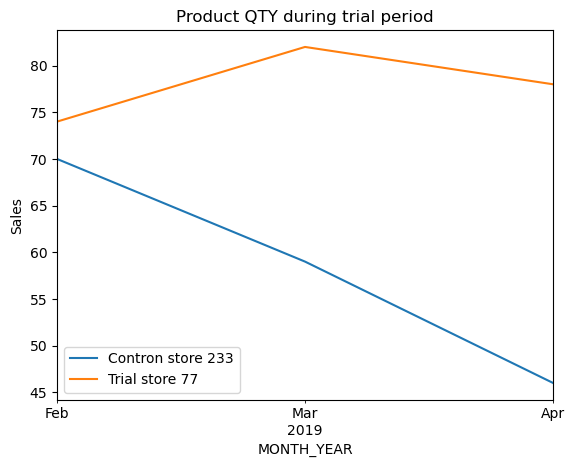

In [92]:
# lets visualize the product QTY during the trial period for each group
grouped_233['PROD_QTY'].sum().plot(label= 'Contron store 233')
grouped_77['PROD_QTY'].sum().plot(label= 'Trial store 77')
plt.ylabel('Sales')
plt.legend()
plt.title('Product QTY during trial period')
plt.show()

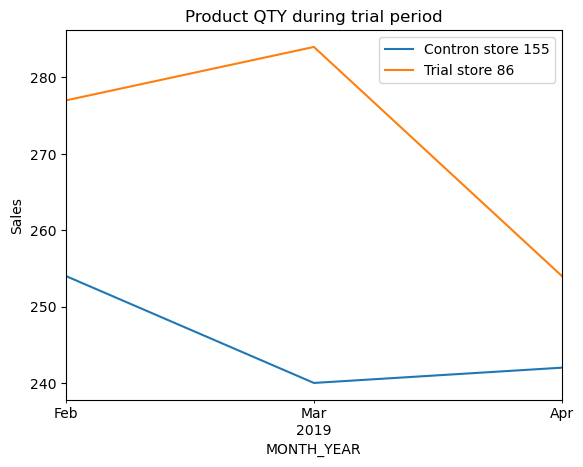

In [93]:
grouped_155['PROD_QTY'].sum().plot(label= 'Contron store 155')
grouped_86['PROD_QTY'].sum().plot(label= 'Trial store 86')
plt.ylabel('Sales')
plt.legend()
plt.title('Product QTY during trial period')
plt.show()

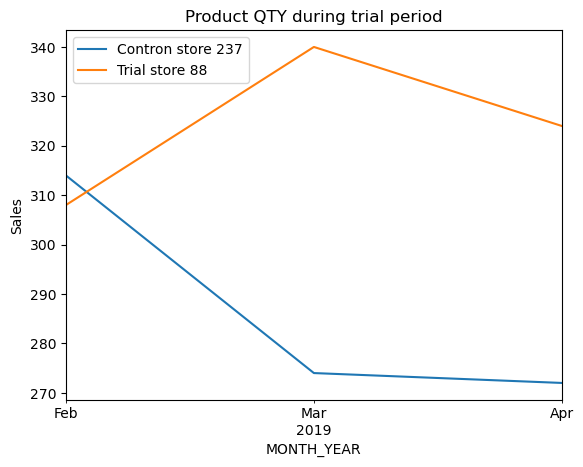

In [94]:
grouped_237['PROD_QTY'].sum().plot(label= 'Contron store 237')
grouped_88['PROD_QTY'].sum().plot(label= 'Trial store 88')
plt.ylabel('Sales')
plt.legend()
plt.title('Product QTY during trial period')
plt.show()

In [95]:
# lets see how they stack up with average transactions per customers
grouped_77['LYLTY_CARD_NBR'].value_counts().mean()

1.0422535211267605

In [96]:
grouped_233['LYLTY_CARD_NBR'].value_counts().mean()

1.0521739130434782

In [97]:
grouped_86['LYLTY_CARD_NBR'].value_counts().mean()

1.2477064220183487

In [98]:
grouped_155['LYLTY_CARD_NBR'].value_counts().mean()

1.2777777777777777

In [99]:
grouped_88['LYLTY_CARD_NBR'].value_counts().mean()

1.2590673575129534

In [100]:
grouped_237['LYLTY_CARD_NBR'].value_counts().mean()

1.178082191780822

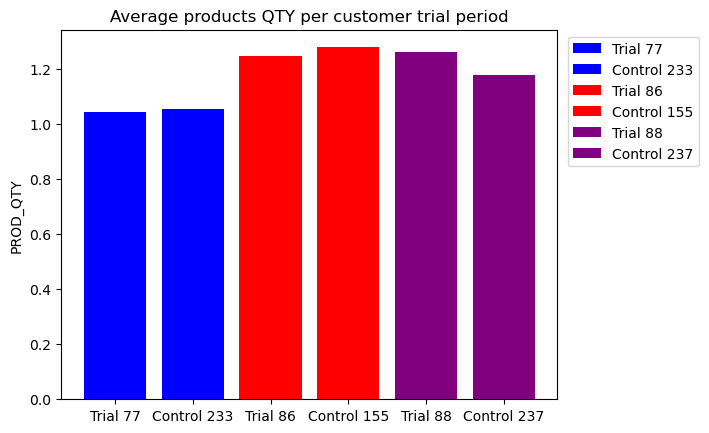

In [104]:
groups_1 = ['Trial 77', 'Control 233']
groups_2 = ['Trial 86', 'Control 155']
groups_3 = ['Trial 88', 'Control 237']

value_grp_1 = [1.042, 1.052]
value_grp_2 = [1.247, 1.277]
value_grp_3 = [1.259, 1.178]

plt.bar(groups_1, value_grp_1, label= groups_1, color = 'blue')
plt.bar(groups_2, value_grp_2, label= groups_2, color = 'red')
plt.bar(groups_3, value_grp_3, label= groups_3, color = 'purple')
plt.ylabel('PROD_QTY')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.30,1))
plt.title('Average products QTY per customer trial period')
plt.show()

#### Comparing the trial stores to control stores the trial stores are outperforming the control stores during this period
#### My recommendation would be to increase the amount of trial store and do another analysis after 3 month to see if the increased sales stay true and stablize at the higher point.

In [105]:
chips_final.to_csv('chips_final.csv')